In [1]:
#question 3
import numpy as np
def attention(Q, K, V):
  d_k = Q.shape[-1]
  attention_scores = np.dot(Q, K.T) / np.sqrt(d_k)
  scores = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=1, keepdims=True)
  output = np.dot(scores, V)
  return output, scores

In [ ]:
#question 4
import numpy as np
def maskedattention(Q, K, V):
  d_k = Q.shape[-1]
  attention_scores = np.dot(Q, K.T) / np.sqrt(d_k)
  mask = np.triu(np.ones(attention_scores.shape), k= 1) * -np.inf
  attention_scores += mask
  scores = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=1, keepdims=True)
  output = np.dot(scores, V)
  return output, scores

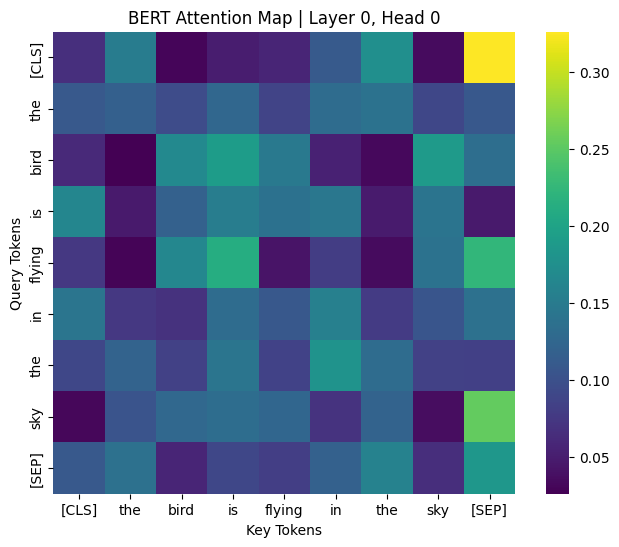

In [5]:
#question 5
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained(
    "bert-base-uncased",
    output_attentions=True
)

model.eval()

sentence = "The bird is flying in the sky"
inputs = tokenizer(sentence, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

attentions = outputs.attentions

layer = 0
head = 0

attention = attentions[layer][0][head]
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

plt.figure(figsize=(8, 6))
sns.heatmap(
    attention,
    xticklabels=tokens,
    yticklabels=tokens,
    cmap="viridis",
    square=True
)
plt.title(f"BERT Attention Map | Layer {layer}, Head {head}")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()
